## COMP40370 Practical 1
DATA EXPLORATION AND PREPROCESSING (Part A)

This practical aims to familiarise with some basic data pre-processing and exploration tools and use some concepts discussed in the lectures. Python is the programming language to use to complete this practical. The datasets needed to complete the practical are described below.  
Assignment Files  
 ./Practical-01.pdf  
 ./ diabetes.csv:    
Expected output files  
 ./Prcatical-01.ipynb  
 ./Prcatical-01.html  
 ./Practical-01-Report.pdf  
 ./ diabetes.csv:  
Requirements  
Python notebook programs.  
 Python 3.8+, pandas 1.3+, numpy 1.20+, sklearn 0.24+.  
 tensorflow 2.0+, seaborn 0.11+, matplotlib 3.5+, scipy 1.9+.

## I) Descriptive statistics

In [38]:
import pandas as pd
import numpy as np
from sklearn import svm
import os
import sys
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

1-Read the data file into a pandas data frame and print the first 5 rows

In [39]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


2-Print the number of rows and columns

In [40]:
df.shape

(788, 9)

3-Calculate the min, max, mean, and std of the ‘age’ column using pandas.

In [41]:
df['Age'].describe().T

count    788.000000
mean      33.215736
std       11.819875
min       12.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

4-What is the mode of the ‘age’ column? Comment on the data’s modality (i.e., bimodal,
trimodal, etc.).  
Based on the information we got, this dataset of 'Age' is Unimodal.  
Because the mean value (33.2)is close to 50% value (29) which corresponds to the most common age range. with a central tendency around 29 years. 

In [42]:
df['Age'].mode()[0]

22

5-Use pandas to calculate the first quartile (Q1) and the third quartile (Q3) of the ‘age’ column.

In [43]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
Q1,Q3

(24.0, 41.0)

6-What is the Interquartile Range of the ‘age’ column?

In [44]:
iqr = Q3-Q1
print(f'Interquartile Range (IQR): {iqr}')

Interquartile Range (IQR): 17.0


7- Print the five-number summary of the ‘age’ column.

In [45]:
min_age = df['Age'].min()
max_age = df['Age'].max()
median_age = df['Age'].median()
summary_df = pd.DataFrame({'Statistic': ['Minimum', 'Q1 (25th percentile)', 'Median (50th percentile)', 'Q3 (75th percentile)', 'Maximum'],
                           'Value': [min_age, Q1, median_age, Q3, max_age]})
summary_df

,Statistic,Value
0,Minimum,12.0
1,Q1 (25th percentile),24.0
2,Median (50th percentile),29.0
3,Q3 (75th percentile),41.0
4,Maximum,81.0


## II) Data visualisation

1-Show a boxplot of the ‘age’ column.

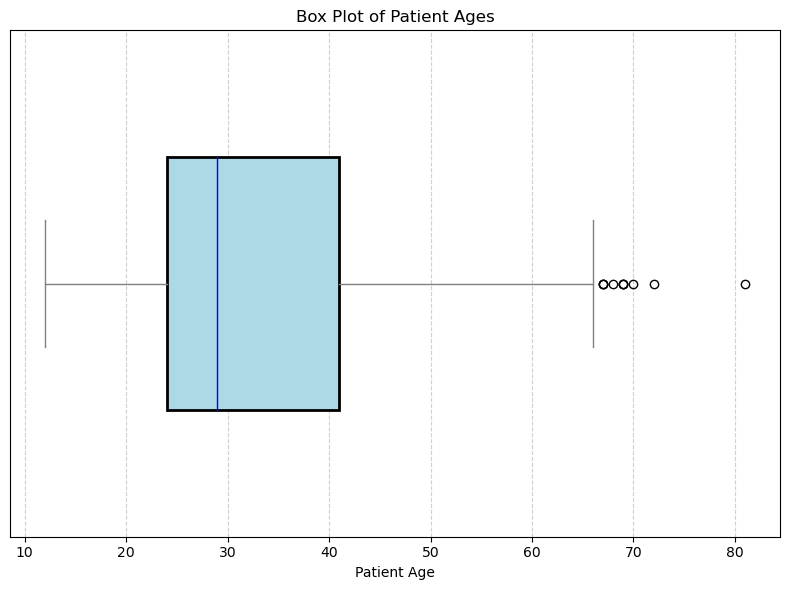

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False, widths=0.5, patch_artist=True, boxprops={'facecolor': 'lightblue', 'linewidth': 2}, medianprops={'color': 'blue'}, whiskerprops={'color': 'gray'}, capprops={'color': 'gray'})
plt.title('Box Plot of Patient Ages')
plt.xlabel('Patient Age')
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2-Show a boxplot of the ‘age’ column of the diabetic and no-diabetic groups side by side.  
The x-axis’s label should be (diabetic) and ‘yes’ under positive patients and ‘no’ under negative patients, and the y-axis’s label should be (patient’s age), as follows:

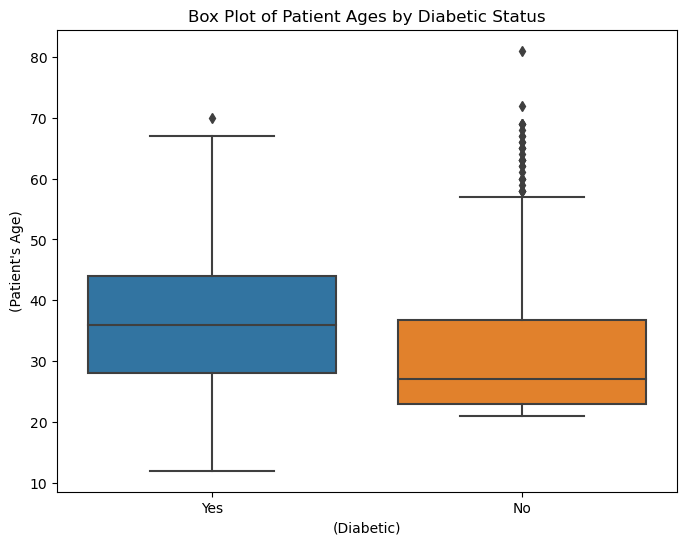

In [47]:
df['Diabetic'] = df['Outcome'].map({0: 'no', 1: 'yes'})
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Diabetic', y='Age')
plt.xlabel('(Diabetic)')
plt.ylabel("(Patient's Age)")
plt.xticks([0, 1], ['Yes', 'No'])
plt.title('Box Plot of Patient Ages by Diabetic Status')
plt.show()

3- Based on the boxplot of question 2, analyse the relationship between the patient’s age and being diabetic in your report.  
This boxplot shows that the patient's age for diabetic are around 28 to 45 and not diabetic are 25 to 35, and also non diabetic have outlier which age is over 55.

4-Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis.

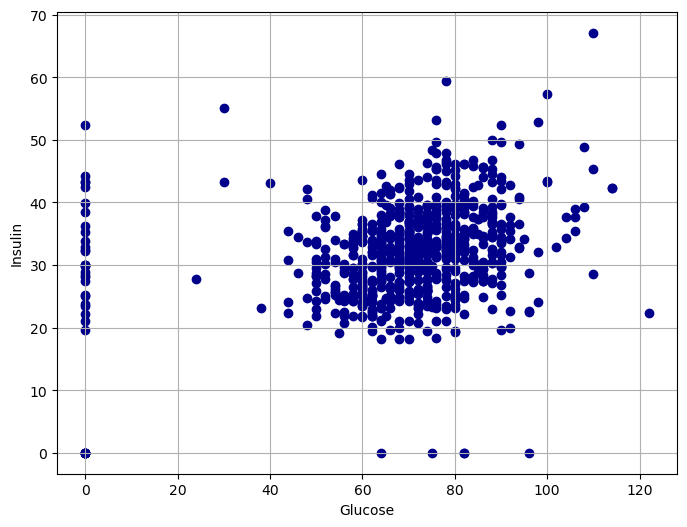

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BloodPressure'],df['BMI'], c='darkblue', marker='o')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()

5-Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis, highlighting diabetic patients with different colours. The colouring label should be ‘diabetic’: yes and no.

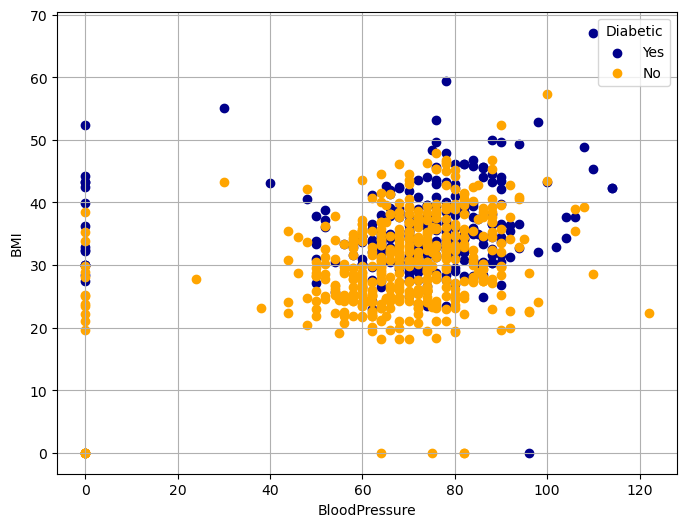

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Diabetic'] == 'yes']['BloodPressure'], df[df['Diabetic'] == 'yes']['BMI'], c='darkblue', marker='o', label='Yes')
plt.scatter(df[df['Diabetic'] == 'no']['BloodPressure'], df[df['Diabetic'] == 'no']['BMI'], c='orange', marker='o', label='No')
plt.xlabel('BloodPressure')
plt.ylabel('BMI')
plt.legend(title='Diabetic')
plt.grid(True)
plt.show()

6-Based on the scatterplot of question 5, analyse the relationship between BMI/Blood pressure and diabetes in your report.  
As the scatter plots shows, The patients BMI and BloodPressure are most concentrate in 20 to 50 and 50 to 90 and also you can see some patients with 0 Blood Pressure.

## III) Data filtering

1-Select all patients with Insulin more than 400. How many patients are diabetic/no-diabetic
among those selected?

In [50]:
df1= df[df['Insulin']>400]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetic
8,2,197,70.0,45,543,30.5,0.158,53,1,yes
13,1,189,60.0,23,846,30.1,0.398,59,1,yes
111,8,155,62.0,26,495,34.0,0.543,46,1,yes
153,1,153,82.0,42,485,40.6,0.687,23,0,no
186,8,181,68.0,36,495,30.1,0.615,60,1,yes


In [51]:
df1['Diabetic'].value_counts()

Diabetic
yes    12
no      8
Name: count, dtype: int64

2- Select all patients with Insulin greater than 400 and Glucose greater than 175. How many patients are diabetic/no-diabetic among those selected?

In [52]:
df2 = df[(df['Insulin'] > 400) & (df['Glucose'] > 175)]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetic
8,2,197,70.0,45,543,30.5,0.158,53,1,yes
13,1,189,60.0,23,846,30.1,0.398,59,1,yes
186,8,181,68.0,36,495,30.1,0.615,60,1,yes
220,0,177,60.0,29,478,34.6,1.072,21,1,yes
228,4,197,70.0,39,744,36.7,2.329,31,0,no
753,0,181,88.0,44,510,43.3,0.222,26,1,yes


In [53]:
df2['Diabetic'].value_counts()

Diabetic
yes    5
no     1
Name: count, dtype: int64

3-What is the average Glucose level of a patient with more than 5 pregnancies and older than 45?

In [54]:
df3 = df[(df['Pregnancies']>5) & (df['Age'] > 45)]
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetic
0,6,148,72.0,35,0,33.6,0.627,50,1,yes
9,8,125,96.0,0,0,0.0,0.232,54,1,yes
12,10,139,80.0,0,0,27.1,1.441,57,0,no
21,8,99,84.0,0,0,35.4,0.388,50,0,no
24,11,143,94.0,33,146,36.6,0.254,51,1,yes
...,...,...,...,...,...,...,...,...,...,...
745,12,100,84.0,33,105,30.0,0.488,46,0,no
749,6,162,62.0,0,0,24.3,0.178,50,1,yes
759,6,190,92.0,0,0,35.5,0.278,66,1,yes
763,10,101,76.0,48,180,32.9,0.171,63,0,no


In [55]:
average_glucose = df3['Glucose'].mean()
print("Average Glucose Level:", average_glucose)

Average Glucose Level: 135.36986301369862


4-Count the distinct values in the ‘pregnancies’ column.

In [56]:
df['Pregnancies'].value_counts()

Pregnancies
1     141
0     112
2     108
3      76
4      69
5      58
6      50
7      46
8      40
9      29
10     24
11     11
13     11
12      9
14      2
15      1
17      1
Name: count, dtype: int64

5-List the distinct values of the ‘pregnancies’ column along with the percentage of diabetic/no-
diabetic of each value. Example:

In [57]:
df.groupby('Pregnancies')['Outcome'].value_counts(normalize=True)

Pregnancies  Outcome
0            0          0.660714
             1          0.339286
1            0          0.773050
             1          0.226950
2            0          0.824074
             1          0.175926
3            0          0.644737
             1          0.355263
4            0          0.666667
             1          0.333333
5            0          0.637931
             1          0.362069
6            0          0.680000
             1          0.320000
7            1          0.565217
             0          0.434783
8            1          0.550000
             0          0.450000
9            1          0.655172
             0          0.344828
10           0          0.583333
             1          0.416667
11           1          0.636364
             0          0.363636
12           0          0.555556
             1          0.444444
13           1          0.545455
             0          0.454545
14           1          1.000000
15           1        

## Question 2: Data Cleaning

## I) Duplicated removal

1. Identify any duplicated records by printing “True” if the row is duplicated and “False”
otherwise.

In [58]:
duplicated_rows = df.duplicated()
duplicated_rows

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool

2. For all duplicated records, keep one record and remove its duplicates.


In [59]:
df = df.drop_duplicates()

3. What is the dimension of the data frame after removing the duplicates?

In [60]:
df.shape

(768, 10)

4.How many duplicated rows were there (before removing the duplicates)?

In [61]:
duplicated_rows.sum()

20

## II) Missing values

1- How many missing values are in the “blood pressure” column?

In [62]:
df['BloodPressure'].isnull().sum()

23

2- Remove the missing records in the “blood pressure” column.

In [63]:
df_cleaned = df[~df['BloodPressure'].isnull()]

In [64]:
df_cleaned.shape

(745, 10)

3- Copy the following columns into a separate data frame: 'Pregnancies', 'Glucose',
'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

In [65]:
df4 = df_cleaned[['Pregnancies', 'Glucose',
'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

4- On the newly copied data from (3). Use sklearn’s train_test_split function to split the data into
90% training and 10% test.

In [66]:
train_df, test_df = train_test_split(df4, test_size=0.10, random_state=42)
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (670, 8)
Test set shape: (75, 8)


5- On the test set, set the Glucose to null for those records. And keep a separate copy for
evaluation in the following questions.

In [67]:
test_df1 = test_df.copy()
test_df1['Glucose'] = np.nan
test_df1['Glucose']

220   NaN
273   NaN
104   NaN
158   NaN
413   NaN
       ..
718   NaN
766   NaN
228   NaN
354   NaN
523   NaN
Name: Glucose, Length: 75, dtype: float64

6- Fill in the missing values of the test set based on the mean of the Glucose of the training set
(90%). Calculate the RMSEs for the imputed values of the test set.

In [68]:
glucose_mean = train_df['Glucose'].mean()
test_df1['Glucose'].fillna(glucose_mean, inplace=True)
actual_values = test_df['Glucose']
imputed_values = test_df1['Glucose']
rmse = sqrt(mean_squared_error(actual_values, imputed_values))
rmse

34.08851888719681

7- Fill in the missing values of the test set based on the median of the Glucose of the training set
(90%). Calculate the RMSEs for the imputed values of the test set.

In [69]:
test_df2 = test_df.copy()
test_df2['Glucose'] = np.nan
test_df2['Glucose']

220   NaN
273   NaN
104   NaN
158   NaN
413   NaN
       ..
718   NaN
766   NaN
228   NaN
354   NaN
523   NaN
Name: Glucose, Length: 75, dtype: float64

In [70]:
glucose_median = train_df['Glucose'].median()
test_df2['Glucose'].fillna(glucose_median, inplace=True)
rmse = sqrt(mean_squared_error(test_df['Glucose'].values, test_df2['Glucose']))
rmse

34.43486605172147

8- Use scikit-learn SimpleImputer with the 'most_frequent' strategy, and calculate RMSE.

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [72]:
train_dfs, test_dfs = train_test_split(df4, test_size=0.10, random_state=42)
test_copy = test_dfs.copy()
test_copy['Glucose'] = np.nan
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(train_dfs)
test_copy = pd.DataFrame(imputer.transform(test_copy), columns=test_copy.columns)
rmse = sqrt(mean_squared_error(test_dfs['Glucose'].values,test_copy['Glucose'].values))
print("RMSE between 'Glucose' values in training and test sets:", rmse)

RMSE between 'Glucose' values in training and test sets: 41.11252850409471


9-Use scikit-learn KNNImputer (for neighbours = 3), and calculate RMSE.

In [73]:
imputer = KNNImputer(n_neighbors=3)
train_dfk, test_dfk = train_test_split(df4, test_size=0.10, random_state=42)
test_copy = test_dfk.copy()
test_copy['Glucose'] = np.nan
imputer = imputer.fit(train_dfk)
test_copy = pd.DataFrame(imputer.transform(test_copy), columns=test_copy.columns)
rmse = sqrt(mean_squared_error(test_dfk['Glucose'].values,test_copy['Glucose'].values))
print("RMSE between 'Glucose' values in training and test sets:", rmse)

RMSE between 'Glucose' values in training and test sets: 30.98769170230395


10- Which Imputer is better?  
In the comparison between SimpleImputer (RMSE = 41.11) and KNNImputer (RMSE = 30.98), KNNImputer with a lower RMSE of 30 is generally a better choice for imputation. It can capture data dependencies, making it more suitable for handling missing data in complex datasets.
